In [1]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Velocidad_sin_Rangos.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [2]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [3]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [4]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              18884 non-null  object 
 1   Trimestre        18884 non-null  int64  
 2   Provincia        18884 non-null  object 
 3   Velocidad        18874 non-null  float64
 4   Accesos          18884 non-null  int64  
 5   Trimestre_Label  18884 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 885.3+ KB
None


In [5]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [6]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CABA': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'BUENOS AIRES',
        'CAPITAL FEDERAL': 'BUENOS AIRES',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
               Año     Trimestre     Provincia     Velocidad       Accesos  \
count        18884  18884.000000         18884  18874.000000  1.888400e+04   
unique           8           NaN            23           NaN           NaN   
top     2023-01-01           NaN  BUENOS AIRES           NaN           NaN   
freq          3457           NaN          3046           NaN           NaN   
mean           NaN      2.477653           NaN     96.171156  1.412328e+04   
std            NaN      1.126947           NaN    379.722905  6.856387e+04   
min            NaN      1.000000           NaN      0.000000  0.000000e+00   
25%            NaN      1.000000           NaN      4.000000  2.600000e+01   
50%            NaN      2.000000           NaN     12.300000  6.725000e+02   
75%            NaN      4.000000           NaN     50.100000  6.114000e+03   
max            NaN      4.000000           NaN  10000.000000  1.3463

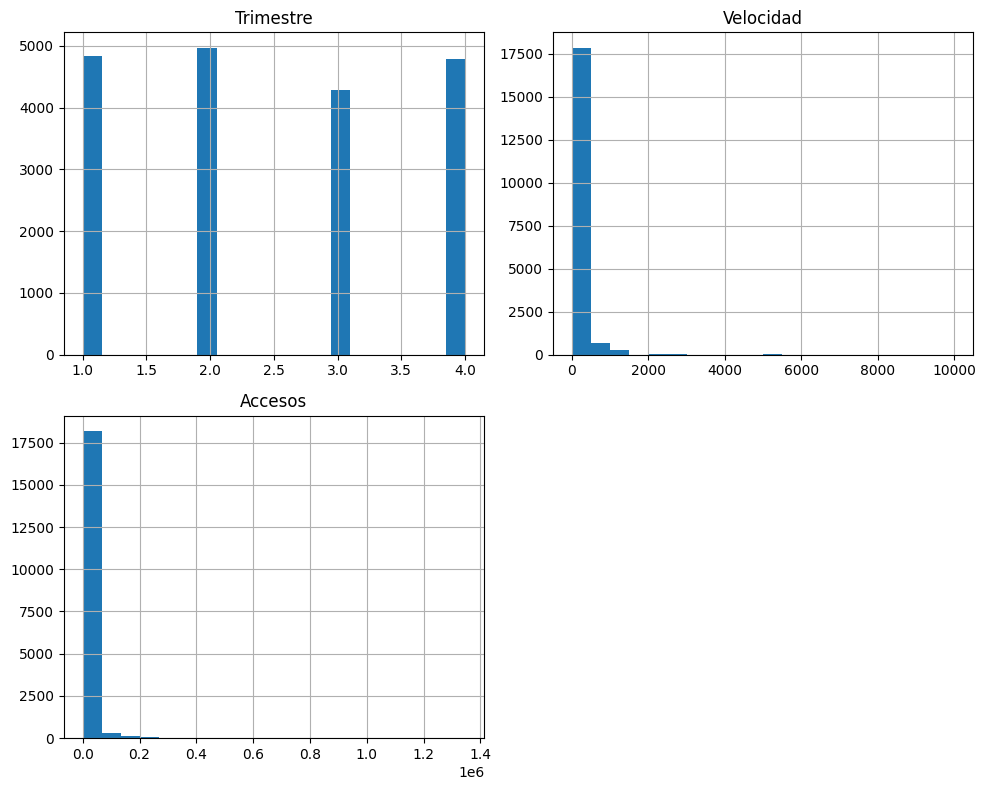

In [7]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
           Trimestre  Velocidad   Accesos
Trimestre   1.000000   0.000839 -0.000093
Velocidad   0.000839   1.000000 -0.015584
Accesos    -0.000093  -0.015584  1.000000


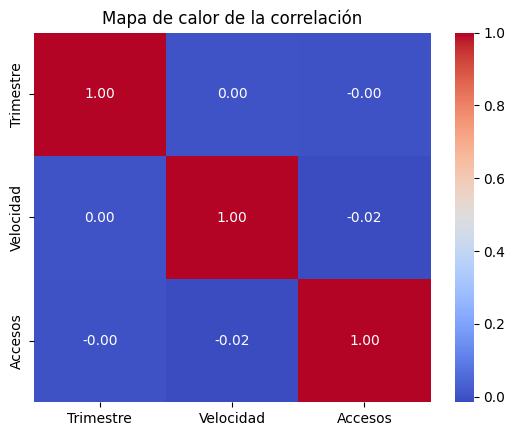

In [8]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [9]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Año y Provincia:
Provincia   BUENOS AIRES  CATAMARCA  CHACO  CHUBUT  CORRIENTES  CÓRDOBA  \
Año                                                                       
2017-01-01            70         12     23      16          21       25   
2018-01-01           281         53     87      71          82      110   
2019-01-01           352         62     96      82          82      158   
2020-01-01           473         78    110      90          83      190   
2021-01-01           527         89    111     100          98      212   
2022-01-01           525         86    116     120         106      225   
2023-01-01           553         90    120     131         114      246   
2024-01-01           265         47     58      75          58      126   

Provincia   ENTRE RÍOS  FORMOSA  JUJUY  LA PAMPA  ...  NEUQUÉN  RÍO NEGRO  \
Año                                               ...                       
2017-01-01          24       19     12        20  

Tabla de contingencia entre Año y Provincia:
Provincia   BUENOS AIRES  CATAMARCA  CHACO  CHUBUT  CORRIENTES  CÓRDOBA  \
Año                                                                       
2017-01-01            70         12     23      16          21       25   
2018-01-01           281         53     87      71          82      110   
2019-01-01           352         62     96      82          82      158   
2020-01-01           473         78    110      90          83      190   
2021-01-01           527         89    111     100          98      212   
2022-01-01           525         86    116     120         106      225   
2023-01-01           553         90    120     131         114      246   
2024-01-01           265         47     58      75          58      126   

Provincia   ENTRE RÍOS  FORMOSA  JUJUY  LA PAMPA  ...  NEUQUÉN  RÍO NEGRO  \
Año                                               ...                       
2017-01-01          24       19     12        20  

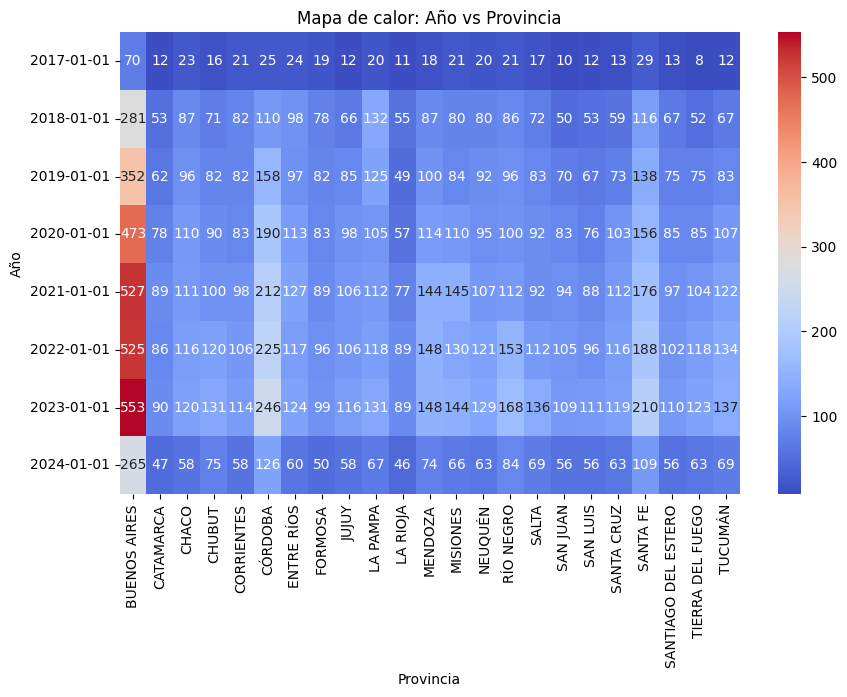

Tabla de contingencia entre Año y Trimestre_Label:
Trimestre_Label   Q1   Q2   Q3   Q4
Año                                
2017-01-01         0    0    0  447
2018-01-01       451  493  517  521
2019-01-01       532  556  601  617
2020-01-01       625  647  676  738
2021-01-01       745  766  778  752
2022-01-01       764  779  845  839
2023-01-01       862  855  862  878
2024-01-01       864  874    0    0


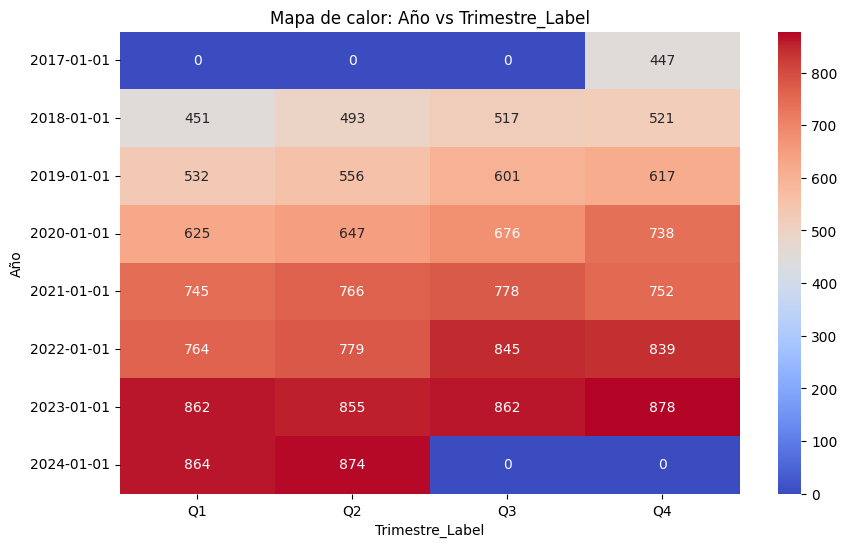

Tabla de contingencia entre Provincia y Año:
Año                  2017-01-01  2018-01-01  2019-01-01  2020-01-01  \
Provincia                                                             
BUENOS AIRES                 70         281         352         473   
CATAMARCA                    12          53          62          78   
CHACO                        23          87          96         110   
CHUBUT                       16          71          82          90   
CORRIENTES                   21          82          82          83   
CÓRDOBA                      25         110         158         190   
ENTRE RÍOS                   24          98          97         113   
FORMOSA                      19          78          82          83   
JUJUY                        12          66          85          98   
LA PAMPA                     20         132         125         105   
LA RIOJA                     11          55          49          57   
MENDOZA                      18 

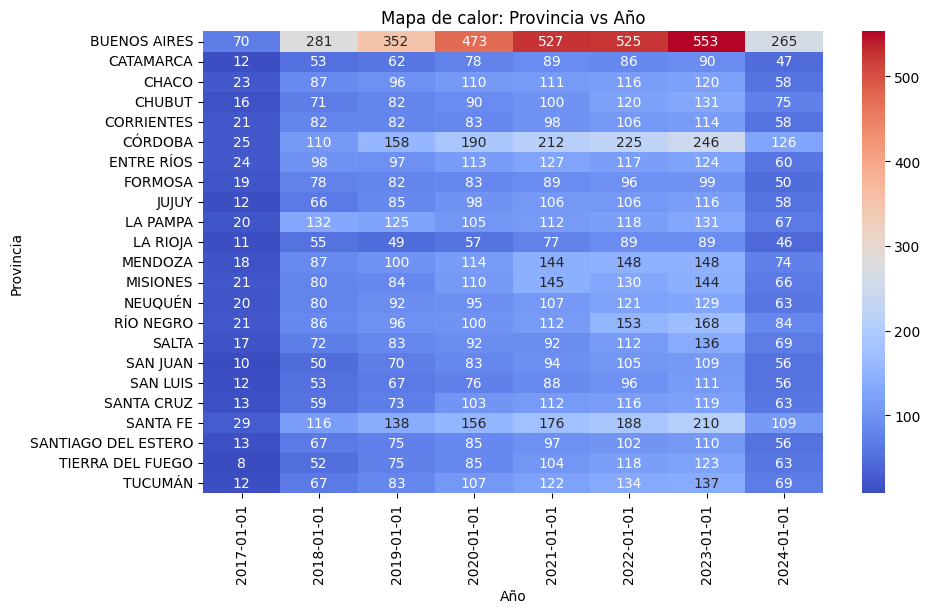

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label       Q1   Q2   Q3   Q4
Provincia                              
BUENOS AIRES         779  798  689  780
CATAMARCA            130  138  118  131
CHACO                188  187  161  185
CHUBUT               175  185  153  172
CORRIENTES           164  170  146  164
CÓRDOBA              331  341  292  328
ENTRE RÍOS           194  197  173  196
FORMOSA              153  156  134  153
JUJUY                167  170  144  166
LA PAMPA             207  211  187  205
LA RIOJA             118  131  106  118
MENDOZA              215  217  188  213
MISIONES             199  203  175  203
NEUQUÉN              179  183  165  180
RÍO NEGRO            212  218  182  208
SALTA                174  176  151  172
SAN JUAN             151  151  131  144
SAN LUIS             144  145  129  141
SANTA CRUZ           169  177  148  164
SANTA FE             292  295  254  281
SANTIAGO DEL ESTERO  152  163  140  150
TIERRA DEL FUEGO     16

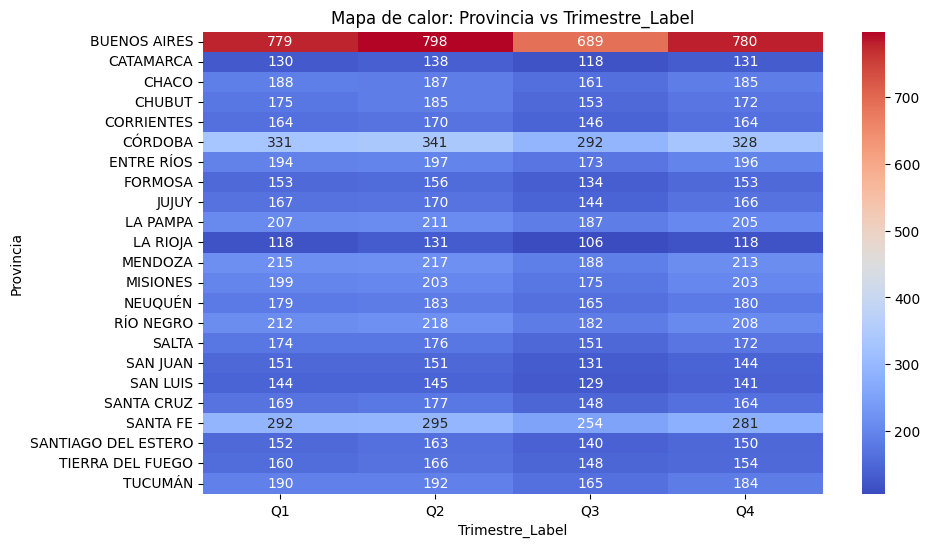

Tabla de contingencia entre Trimestre_Label y Año:
Año              2017-01-01  2018-01-01  2019-01-01  2020-01-01  2021-01-01  \
Trimestre_Label                                                               
Q1                        0         451         532         625         745   
Q2                        0         493         556         647         766   
Q3                        0         517         601         676         778   
Q4                      447         521         617         738         752   

Año              2022-01-01  2023-01-01  2024-01-01  
Trimestre_Label                                      
Q1                      764         862         864  
Q2                      779         855         874  
Q3                      845         862           0  
Q4                      839         878           0  


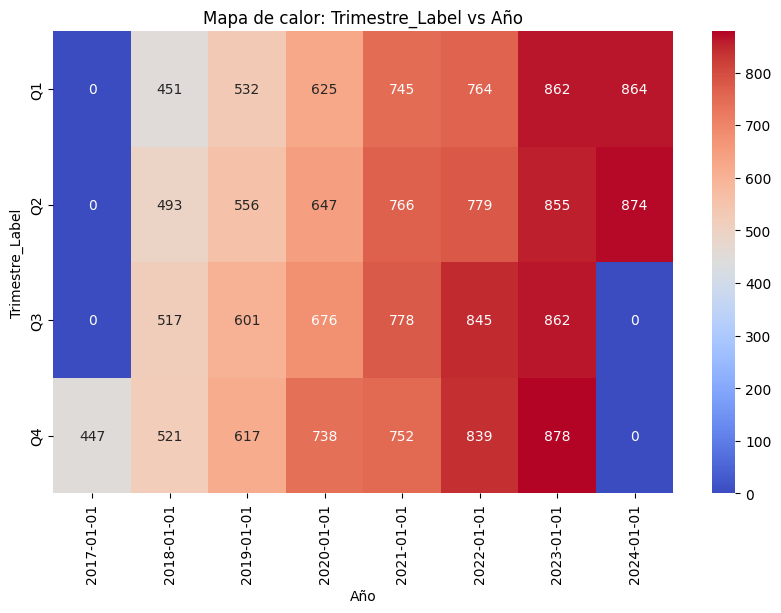

Tabla de contingencia entre Trimestre_Label y Provincia:
Provincia        BUENOS AIRES  CATAMARCA  CHACO  CHUBUT  CORRIENTES  CÓRDOBA  \
Trimestre_Label                                                                
Q1                        779        130    188     175         164      331   
Q2                        798        138    187     185         170      341   
Q3                        689        118    161     153         146      292   
Q4                        780        131    185     172         164      328   

Provincia        ENTRE RÍOS  FORMOSA  JUJUY  LA PAMPA  ...  NEUQUÉN  \
Trimestre_Label                                        ...            
Q1                      194      153    167       207  ...      179   
Q2                      197      156    170       211  ...      183   
Q3                      173      134    144       187  ...      165   
Q4                      196      153    166       205  ...      180   

Provincia        RÍO NEGRO  SALTA  

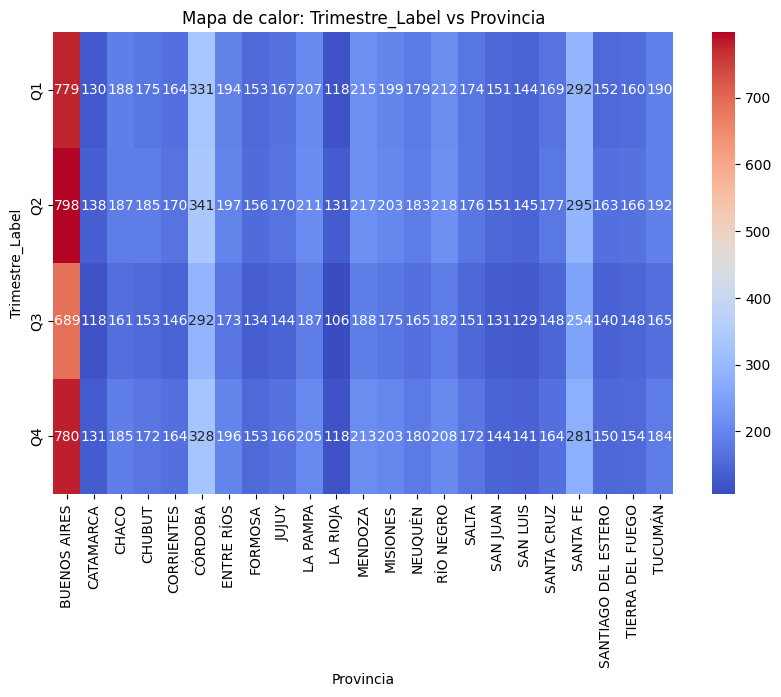

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


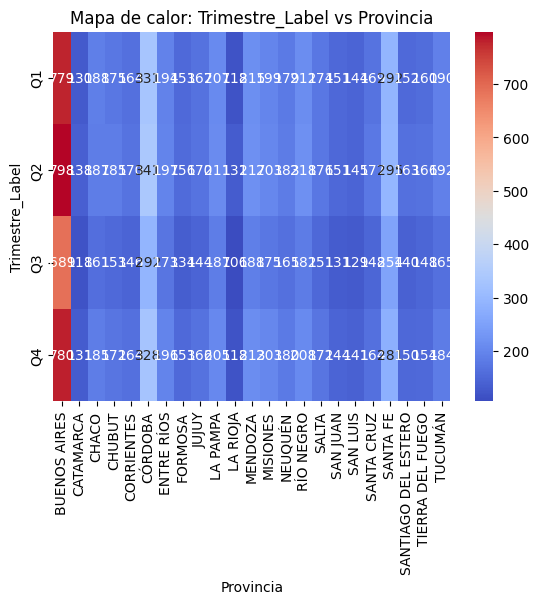

In [11]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


In [12]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
       Trimestre  Velocidad   Accesos
0      -0.423858        NaN -0.190503
1      -0.423858        NaN -0.205132
2      -0.423858        NaN -0.205920
3      -0.423858        NaN  0.402726
4      -0.423858        NaN -0.190795
...          ...        ...       ...
18879   1.350896        NaN  0.453862
18880   1.350896        NaN -0.204884
18881   1.350896        NaN  0.147585
18882   1.350896        NaN -0.186988
18883   1.350896        NaN -0.142299

[18884 rows x 3 columns]


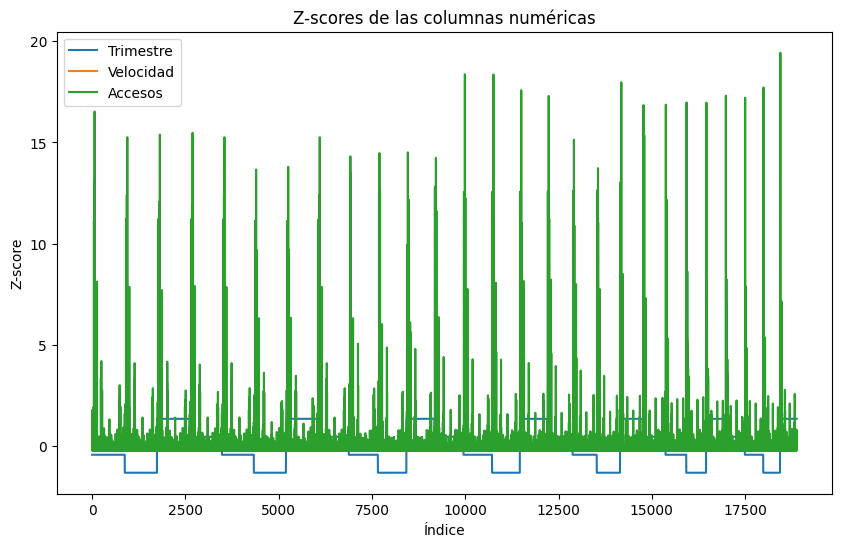

In [13]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [14]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Año':
Año
2023-01-01    3457
2022-01-01    3227
2021-01-01    3041
2020-01-01    2686
2019-01-01    2306
2018-01-01    1982
2024-01-01    1738
2017-01-01     447
Name: count, dtype: int64

Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           3046
CÓRDOBA                1292
SANTA FE               1122
MENDOZA                 833
RÍO NEGRO               820
LA PAMPA                810
MISIONES                780
ENTRE RÍOS              760
TUCUMÁN                 731
CHACO                   721
NEUQUÉN                 707
CHUBUT                  685
SALTA                   673
SANTA CRUZ              658
JUJUY                   647
CORRIENTES              644
TIERRA DEL FUEGO        628
SANTIAGO DEL ESTERO     605
FORMOSA                 596
SAN JUAN                577
SAN LUIS                559
CATAMARCA               517
LA RIOJA                473
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre

In [15]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


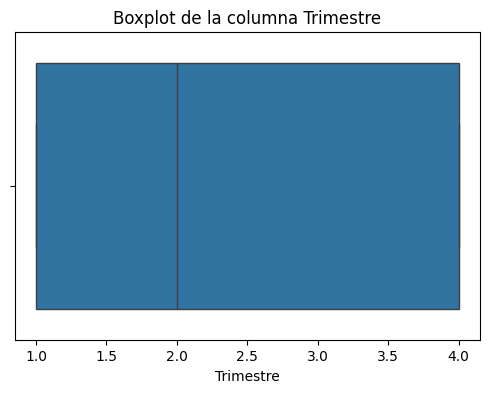

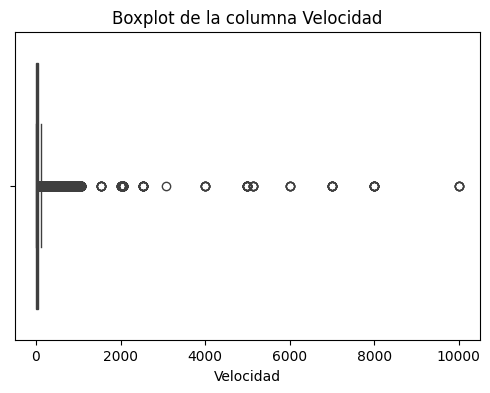

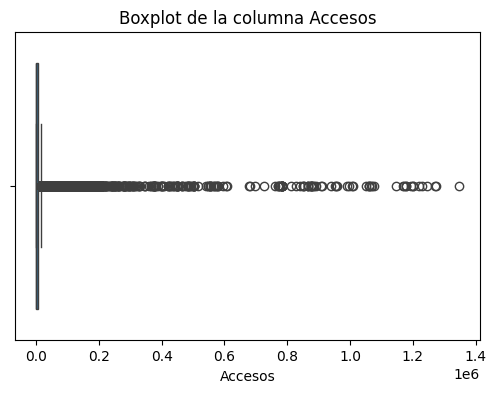

In [16]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [17]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                 0
Trimestre           0
Provincia           0
Velocidad          10
Accesos             0
Trimestre_Label     0
dtype: int64


In [18]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [19]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")

In [20]:
# Reemplazar valores negativos por NaN
df.loc[df.select_dtypes(include=[np.number]).lt(0).any(axis=1), columnas_negativas] = np.nan
print("\nValores negativos reemplazados por NaN.")


Valores negativos reemplazados por NaN.


In [21]:
# Confirmar que los valores negativos han sido reemplazados por NaN
print("\nConfirmando reemplazo de valores negativos por NaN:")
print(df.isnull().sum())


Confirmando reemplazo de valores negativos por NaN:
Año                 0
Trimestre           0
Provincia           0
Velocidad          10
Accesos             0
Trimestre_Label     0
dtype: int64


In [22]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO\Velocidad_sin_Rangos.csv


In [23]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Trimestre     0.049937
Velocidad    14.304939
Accesos      11.228155
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Trimestre     -1.377860
Velocidad    273.817899
Accesos      152.041174
dtype: float64


In [24]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
    Variable       VIF
0      const  5.941306
1  Trimestre  1.000001
2  Velocidad  1.000244
3    Accesos  1.000243


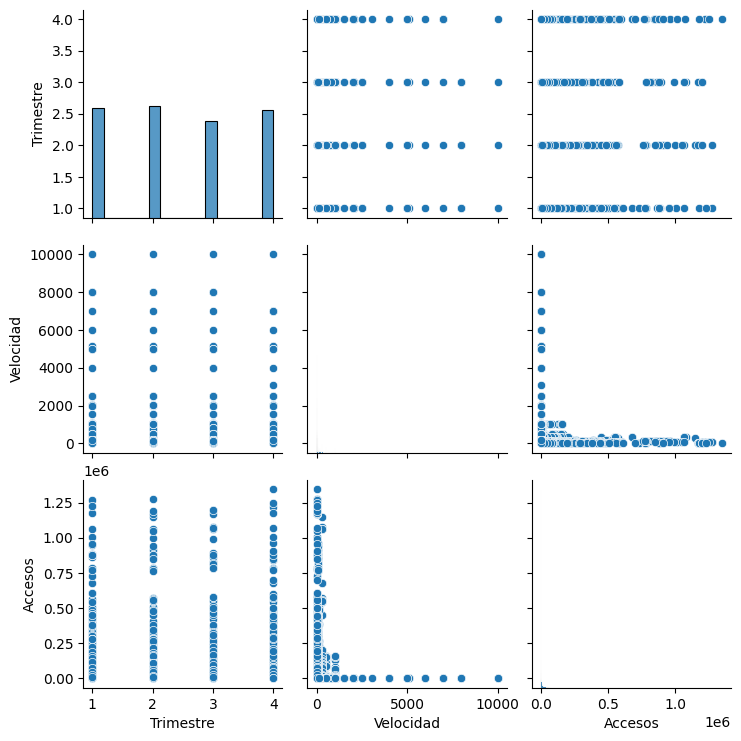

In [25]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [26]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Año':
           Trimestre                                              Velocidad  \
               count      mean       std  min  25%  50%  75%  max     count   
Año                                                                           
2017-01-01     447.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0     447.0   
2018-01-01    1982.0  2.559031  1.108135  1.0  2.0  3.0  4.0  4.0    1982.0   
2019-01-01    2306.0  2.565048  1.114827  1.0  2.0  3.0  4.0  4.0    2306.0   
2020-01-01    2686.0  2.568503  1.122795  1.0  2.0  3.0  4.0  4.0    2685.0   
2021-01-01    3041.0  2.505426  1.111270  1.0  2.0  3.0  3.0  4.0    3038.0   
2022-01-01    3227.0  2.545088  1.114381  1.0  2.0  3.0  4.0  4.0    3225.0   
2023-01-01    3457.0  2.507955  1.121139  1.0  2.0  3.0  4.0  4.0    3455.0   
2024-01-01    1738.0  1.502877  0.500136  1.0  1.0  2.0  2.0  2.0    1736.0   

                        ...                 Accesos                \
                  mean  ...

In [27]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
13



Estadísticas por grupo de 'Año':
            Trimestre   Velocidad       Accesos
Año                                            
2017-01-01   4.000000   21.929960  17606.760626
2018-01-01   2.559031   23.134878  16633.797679
2019-01-01   2.565048   45.456154  15423.322203
2020-01-01   2.568503  102.605788  13689.963887
2021-01-01   2.505426  160.222641  13181.976652
2022-01-01   2.545088   91.212543  13766.047412
2023-01-01   2.507955  112.938613  13257.019381
2024-01-01   1.502877  119.838825  13342.498849


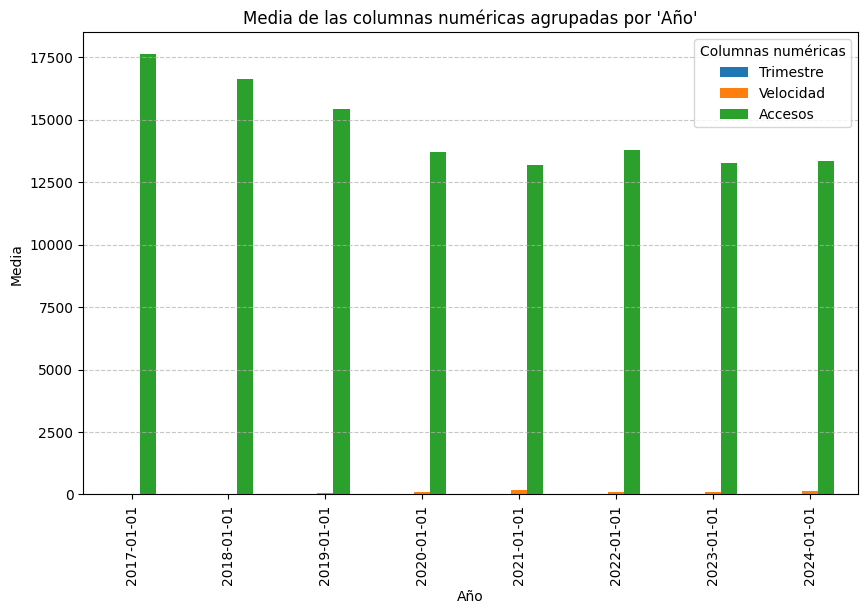


Estadísticas por grupo de 'Provincia':
                     Trimestre   Velocidad       Accesos
Provincia                                               
BUENOS AIRES          2.482600  147.609293  50159.537098
CATAMARCA             2.483559  106.195621   2779.982592
CHACO                 2.475728  103.959153   4866.679612
CHUBUT                2.470073   39.750218   5231.179562
CORRIENTES            2.481366   66.277009   5405.177019
CÓRDOBA               2.477554  105.248294  18963.206656
ENTRE RÍOS            2.488158  106.936225   8958.994737
FORMOSA               2.481544   49.587730   2358.753356
JUJUY                 2.477589  128.456587   4079.893354
LA PAMPA              2.481481   49.111742   3368.332099
LA RIOJA              2.473573   61.696440   3879.926004
MENDOZA               2.478992   80.250630   7879.848739
MISIONES              2.489744   89.161410   5386.993590
NEUQUÉN               2.489392   62.156709   5297.664781
RÍO NEGRO             2.470732   88.530562   471

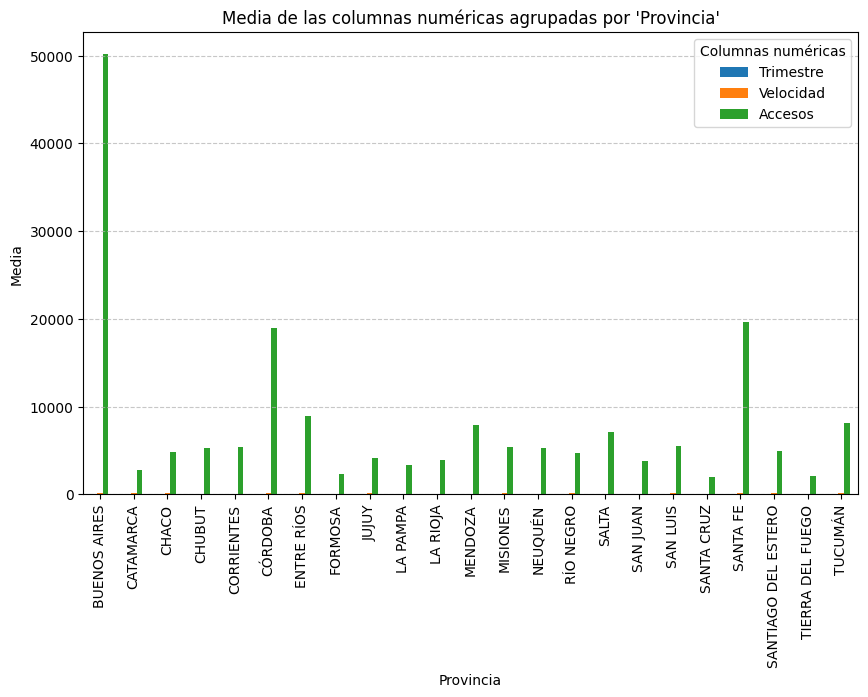


Estadísticas por grupo de 'Trimestre_Label':
                 Trimestre   Velocidad       Accesos
Trimestre_Label                                     
Q1                     1.0   93.665781  14173.992567
Q2                     2.0   96.655609  14107.164588
Q3                     3.0  101.967984  14020.237205
Q4                     4.0   93.026196  14180.757304


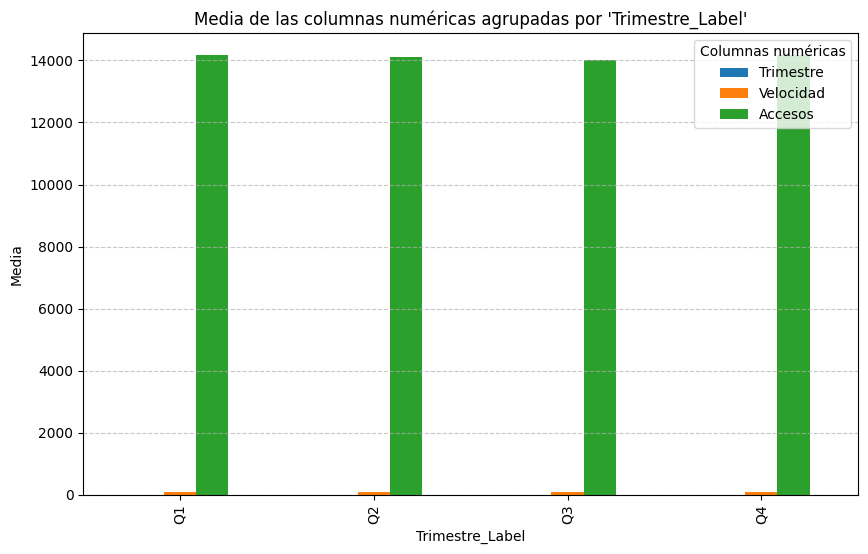

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Análisis y Limpieza de Datos con Pandas y Seaborn
Este Jupyter Notebook realiza un análisis y limpieza de datos utilizando las bibliotecas pandas, numpy, matplotlib y seaborn. Su objetivo es transformar un archivo CSV en un conjunto de datos limpio, consistente y listo para su análisis posterior.

# Contenido
Carga del archivo y normalización de nombres de columnas

Carga de un archivo CSV con verificación de existencia.
Normalización de los nombres de las columnas para mantener consistencia.
Verificación y conversión de tipos de datos

Identificación y conversión de columnas al tipo adecuado (por ejemplo, convertir Trimestre a int64).
Creación de etiquetas descriptivas

Generación de una nueva columna (Trimestre_Label) para mejorar la legibilidad de los datos.
Información básica del DataFrame

Presentación de detalles básicos del DataFrame (info(), tipos de datos, valores no nulos).
Reemplazo de variaciones específicas y normalización de nombres

Estandarización de valores en columnas categóricas como Provincia, Partido y Localidad.
Análisis descriptivo y exploración inicial

Cálculo de estadísticas descriptivas.
Visualización de distribuciones con histogramas.
Análisis de correlación

Cálculo y visualización de la matriz de correlación con mapas de calor para identificar relaciones entre variables numéricas.
Tablas de contingencia

Creación de tablas de contingencia para el análisis de relaciones entre categorías.
Detección y manejo de valores atípicos

Cálculo de Z-scores para identificar valores atípicos en columnas numéricas.
Conteo de categorías

Conteo y análisis de las categorías presentes en columnas categóricas.
Manejo de valores negativos

Identificación y tratamiento de valores negativos en las columnas numéricas (reemplazo por NaN).
Análisis de distribuciones

Evaluación de la asimetría (skewness) y curtosis (kurtosis) para entender la forma de las distribuciones.
Revisión de multicolinealidad

Cálculo del Factor de Inflación de la Varianza (VIF) para identificar multicolinealidad entre variables numéricas.
Visualización de relaciones entre variables

Uso de gráficos de dispersión múltiple (pairplot) para identificar patrones entre variables numéricas.
Agrupación y resumen de datos

Agrupación por categorías y generación de estadísticas agregadas para cada grupo.
Verificación de duplicados

Identificación y manejo de filas duplicadas.
Guardado de datos limpios

Guardado del DataFrame procesado en el archivo original o uno nuevo.
# Requisitos
Python 3.x

# Bibliotecas: 
pandas, numpy, matplotlib, seaborn, scipy, statsmodels

# Instalación de las bibliotecas:

bash

pip install pandas numpy matplotlib seaborn scipy statsmodels  

# Uso
Coloca el archivo CSV en la misma carpeta que el notebook.
Abre el notebook en Jupyter y ejecuta las celdas en orden.
Verifica los resultados y guarda el archivo procesado.

# Conclusiones
Este notebook es una herramienta integral para la limpieza y análisis de datos. Aborda problemas comunes como:

Datos inconsistentes: Nombres de columnas y valores estandarizados.
Datos faltantes: Manejo de valores nulos.
Valores atípicos: Identificación y análisis de outliers.
Relaciones entre variables: Visualización de correlaciones y patrones.
Problemas estructurales: Detección de duplicados y valores negativos.
Con este flujo de trabajo, los datos estarán listos para análisis más avanzados o modelado.

# Autor
Elaborado por: Harry Guevara